# Simulations du signal initial idéal

## Table des matières 
+ [Fonction de Transfert](#fonction-de-transfert)
    + [imports](#imports)
    + [Définition de la fonction de transfert](#définition-de-la-fonction-de-transfert)
+ [Signaux d'entrée et de sortie](#signaux-dentrée-et-de-sortie)
+ [Simulation de la fonction de transfert](#simulation-de-la-fonction-de-transfert)
+ [Étapes restantes](#étapes-restantes)

## Fonction de Transfert
Calcul de la fonction de transfert et affichage des lieu de Bodes
### imports
Import des package néecessaires

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import chirp
from IPython.display import display

### Définition de la fonction de transfert
On définit une fonction permettant de tracer la fonction de transfert à partir d'un échantillon dans le temps. La formule utilisée est la suivante :

$$ H(j\omega) = \frac{1}{1+jQ(x-1/x)}  $$

où $x=\omega / \omega_0$. On utilise la précision machine de 1e-16 pour éviter les divisions par 0

Text(0, 0.5, 'Phase (radians)')

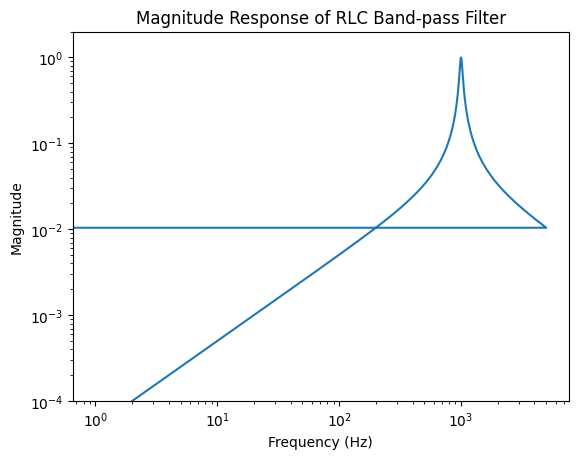

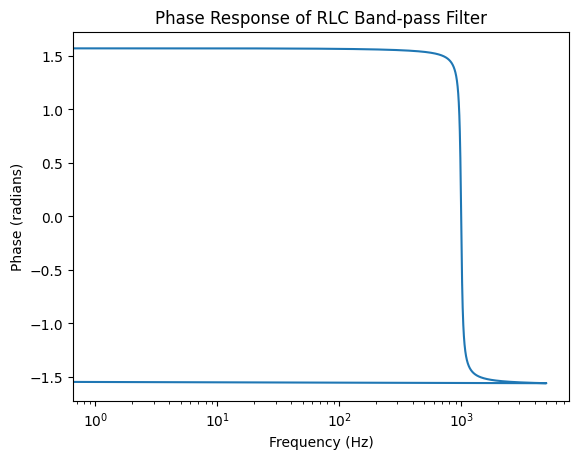

In [46]:
# Define the transfer function in terms of the central frequency and quality factor
def transfer_function(f, f0, Q):
    w0 = 2 * np.pi * f0
    w = 2 * np.pi * f
    x= w/w0
    return 1/(1+1.j*Q*(x-1/(x+1e-16)))

# Parameters of transfer function
Q = 20
f0 = 1000
samplingf = 10000 #(Hz)
timelenght = 1 #(s)
# ############################### #

N = int(samplingf*timelenght) # number of points
beta = f0/Q

t = np.linspace(0, timelenght, N, endpoint=False) # Definition of time vector
frequencies = np.fft.fftfreq(len(t), d=t[1]-t[0]) # Definition of associated frequencies vector


TF_values = transfer_function(frequencies, f0, Q) # Calculation of trnasfert function (TF :TransferFunction)
transNorm = np.absolute(TF_values)
transAngle = np.angle(TF_values)
TF_time_values = np.fft.ifft(np.fft.ifftshift(TF_values))

# Plot the Bode diagrams
plt.figure()
plt.loglog(frequencies, transNorm)
plt.ylim(0.0001, 2)
plt.title('Magnitude Response of RLC Band-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.grid(which='both', axis='both')

plt.figure()
plt.semilogx(frequencies, transAngle)
plt.xscale('log')
plt.title('Phase Response of RLC Band-pass Filter' )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')


## Signaux d'entrée et de sortie
On initialise un signal d'entrée qu'on transforme dans l'espace des fréqences avec une FFT : $\overline{V}_i(\omega) = \mathcal{F}(V_i(t))$ où $V_i$ est le signal d'entrée. On calcul calcul ensuite le signal de sortie en le multipliant par la fonction de transfert dans le domaine des fréquences : $\overline{V}_s(\omega) = H(\omega)\overline{V}_i(\omega)$.  

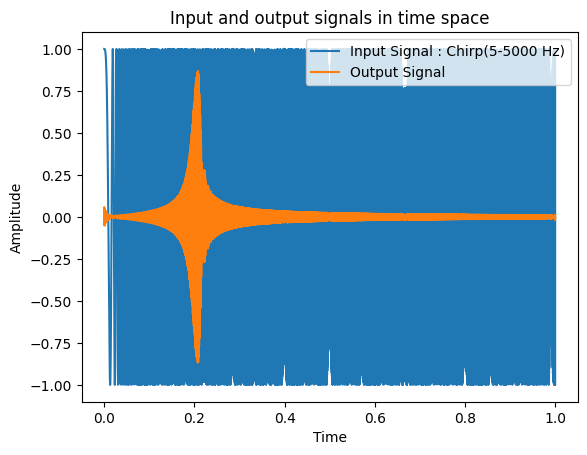

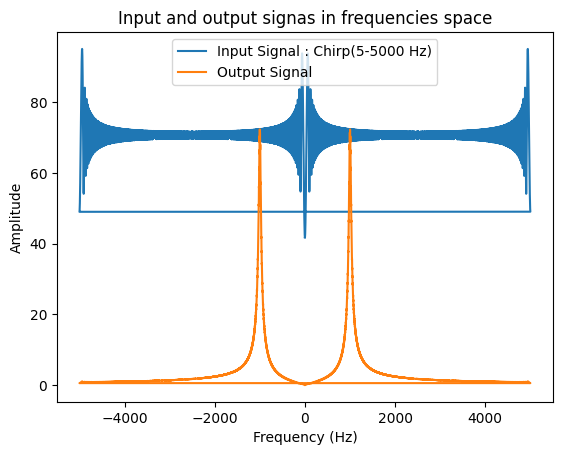

In [47]:
# MULTIPLE INPUT SIGNALS, UNCOMMENT THE LINES TO CHANGE THE SIGNAL TYPE

# %%%%                  SIN PUR              %%%%% #
# sinfreq =1000
# input_signal = np.sin(2*np.pi*sinfreq*t) # Sin pur
# type_signal=f'Sin pur (f={sinfreq})'

# %%%%          COMBINAISON DE SIN          %%%%% #
# input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Combinaison de sin
# type_signal='Combinaison de sin'

# %%%%               BRUIT BLANC             %%%%% #
# input_signal = np.random.normal(0, 1, N) # White noise
# type_signal='Bruit blanc'

# %%%%                   DIRAC               %%%%% #
# def create_dirac_peak(length, position):
#     signal = np.zeros(length)
#     signal[position] = 1
#     return signal
# input_signal = create_dirac_peak(N, 0) # Dirac
# type_signal='Dirac'

# %%%%               CHIRP                    %%%%% #
frequency_start = 5  # Starting frequency in Hz
frequency_end = 5000  # Ending frequency in Hz
input_signal = chirp(t, f0=frequency_start, f1=frequency_end, t1=1, method='linear') # Chirp
type_signal=f'Chirp({frequency_start}-{frequency_end} Hz)'

#Calculation of output signal
input_signal_freq = np.fft.fft(input_signal)

output_signal_freq = TF_values*input_signal_freq
output_signal = np.real(np.fft.ifft(output_signal_freq))

# Plot the signals in time and frequencies spaces
# Time space
plt.figure()
plt.plot(t, input_signal, label=f'Input Signal : {type_signal}')
plt.plot(t, output_signal, label='Output Signal')
plt.title('Input and output signals in time space')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
# Frequencies space
plt.figure()
plt.plot(frequencies, np.absolute(input_signal_freq), label=f'Input Signal : {type_signal}')
plt.plot(frequencies, np.absolute(output_signal_freq),label='Output Signal')
plt.title('Input and output signas in frequencies space')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.show()

## Simulation de la fonction de transfert

La fonction de transfert est approximée avec la corrélation des signaux d'entrée et de sortie, comme illustré ci-dessous.

$$V_s(t) = h(t)\ast V_i(t) $$

On corrèle des deux côtés avec $V_i(-t)$

$$V_s(t)\star V_i(-t) = h(t)\ast V_i(t)\star V_i(-t) $$

On applique la transformée de Fourrier

$$\overline{V}_s(\omega)\overline{V}_i^*(\omega) = H(\omega)\overline{V}_i(\omega)\overline{V}_i^*(\omega)$$

$$ H(\omega) = \frac{\overline{V}_s(\omega)\overline{V}_i^*(\omega)}{\overline{V}_i(\omega)\overline{V}_i^*(\omega)} $$

On définit

$$ R_{xx} =\overline{V}_i(\omega)\overline{V}_i^*(\omega) = \mathcal{F}[V_i(t)\star V_i(-t) ] $$

$$ R_{xy} =\overline{V}_s(\omega)\overline{V}_i^*(\omega) = \mathcal{F}[V_s(t)\star V_i(-t) ] $$

Ainsi, 

$$H(\omega) = \frac{R_{xy}}{R_{xx}} = \frac{\mathcal{F}[V_i(t)\star V_i(-t) ]}{\mathcal{F}[V_s(t)\star V_i(-t) ]} $$

De cette manière, en connaissant les signaux d'entrée et de sortie on peut retrouver une approximation de la fonction de transfert en divisant l'intercorrélation $V_s(t)\star V_i(-t)$ par l'autocorrélation $V_i(t)\star V_i(-t)$. Bien que la convolution est communtative, la corrélation ne l'est pas, alors ici l'ordre est important. Il est à noter que la fonction np.correlate de numpy fait automatiquement l'inversion temporelle du deuxième signal, il n'est alors pas nécéssaire d'inverser les signaux manuellement. La fréquence centrale $f_0$ est approximée par la fréquence associée à la valeur maximale de la fonction de transfert. La largeur de bande $\beta$ est approximée par la différence entre les fréquences où l'amplitude de la fonction de transfert a diminuée de $1/\sqrt{2}$ par rapport à son maximum. $Q$ est ensuite calculée à partir de sa définition $Q=\omega_0/\beta$.


,Variable,Real Value,Approximate Value
0,f0,1000.0,999.549977
1,Q,20.0,20.397959
2,beta,50.0,49.002450


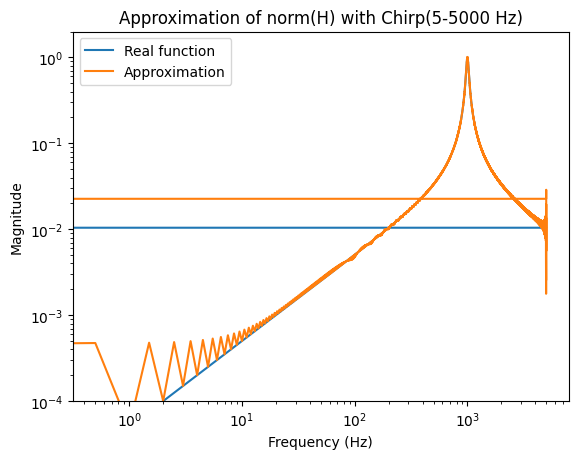

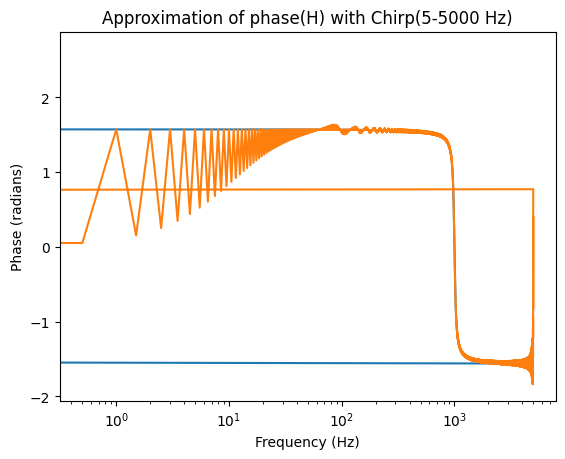

In [48]:

Rxx = np.fft.fft(np.correlate(input_signal, input_signal, mode='full'))
Rxy = np.fft.fft(np.correlate(output_signal, input_signal, mode='full'))

frequencies2 = np.fft.fftfreq(len(Rxy),1/samplingf )

H_approx = Rxy/Rxx

TF_approx_norm = np.absolute(H_approx)
TF_approx_angle = np.angle(H_approx)


TF_approx_norm = np.absolute(H_approx)
TF_approx_angle = np.angle(H_approx)

# Calculation of Q and f_0
max_TF_approx= max(TF_approx_norm)
maxArg_TF_approx = np.argmax(TF_approx_norm[:int(N/2)]) #f0
f0_approx = frequencies2[maxArg_TF_approx]

threshold = 1/np.sqrt(2)
target_norm = threshold * max_TF_approx

# Lower frequency
lower_bandwidth_index = (np.abs(np.array(TF_approx_norm[:maxArg_TF_approx]) - target_norm)).argmin()
lower_bandwidth_freq = frequencies2[lower_bandwidth_index]

# Upper frequency
upper_bandwidth_index = (np.abs(np.array(TF_approx_norm[maxArg_TF_approx:int(N)]) - target_norm)).argmin() + maxArg_TF_approx
upper_bandwidth_freq = frequencies2[upper_bandwidth_index]

beta_approx = upper_bandwidth_freq - lower_bandwidth_freq

Q_approx = f0_approx/beta_approx

data = {
    'Variable': [r'f0', r'Q', r'beta'],
    'Real Value': [f0, Q, beta],
    'Approximate Value': [f0_approx, Q_approx, beta_approx]
}

df = pd.DataFrame(data)
display(df)

plt.figure()
plt.loglog(frequencies, transNorm, label = 'Real function')
plt.loglog(frequencies2, TF_approx_norm, label = 'Approximation')
plt.ylim(0.0001,2)
plt.title(f'Approximation of norm(H) with {type_signal}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.figure()
plt.semilogx(frequencies, transAngle, label = r'Real function \omega')
plt.semilogx(frequencies2, TF_approx_angle, label = 'Approximation')
plt.title(f'Approximation of phase(H) with {type_signal}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend

plt.show()

## Étapes restantes

+ Choisir le type de signal qu'on désire utiliser
+ Faire varier la durée du signal et la fréquence d'échantillonage (attention le prof a dit que la fréquence d'échantillonage devait rester constante ??)
+ Faire varier d'autres paramètres si il y a lieu (Ex : fréquences pour un chirp ou les sin)
